# Lotka-Volterra Equations

The Lota-Volterra Equations are two ordinary differential equations that describe the predator-prey population relationship as given below.

\\( \frac{dx}{dt} = ax - bxy  \\)

\\( \frac{dy}{dt} = cxy - dy \\)

The formulas assumes the following:
-  Let $ x $ be the population of the prey
-  Let $ y $ be the population of the predator
-  $ dx $ is increased by the product of $ x $ and some constant $ a $
-  $ dx $ is decreased by the product of $ x $, $ y $, and some constant $ b $
-  $ dy $ is increased by the product of $ x $, $ y $ and some constant $ c $
-  $ dy $ is increased by the product of $ y $ and some constant $ d $

In other words, $ dx $ is simply the natural birth rate of prey minus the rate at which they are hunted, which is affected by the number of predators. Similarly, $ dy $ is simply the growth rate of the predators, which is affected by the number of prey to feed on, minus the natural mortality rate of the predators.

For this project, we can use `scipy` and `matplotlib` to solve the problem. The Lotka-Volterra equations can be defined as python functions. The function below, `get_dx()` is the equation for the change in $ x $. The function `get_dy()` is the equation for the change in $ y $. The last function `get_dx_dt()` is just a helper function so the output can be used by `scipy` and `matplotlib`.

In [1]:
from numpy import *
from scipy import integrate
from matplotlib import *
import pylab

a = 1.0
b = 0.5
c = 0.5
d = 2
        
def get_dx(arr_xy):
    return a*arr_xy[0] - b*arr_xy[0]*arr_xy[1]
    
def get_dy(arr_xy):
    return c*arr_xy[0]*arr_xy[1] - d*arr_xy[1]
    
def get_dx_dt(arr_xy, t=0):
    return(get_dx(arr_xy), get_dy(arr_xy))

We use `scipy.integrate.odeint()` to first solve the ordinary differential equations and then perform numerical numerical integration from $ t=0 $ to $ t=30 $ along $ 1000 $ intervals.

In [2]:
init_xy = [2, 2]
t = linspace(0, 30,  1000)      
arr_xy = integrate.odeint(get_dx_dt, init_xy, t)

Lastly, we use `matplotlib` to plot the populations.

Text(0,0.5,'Population (thousands)')

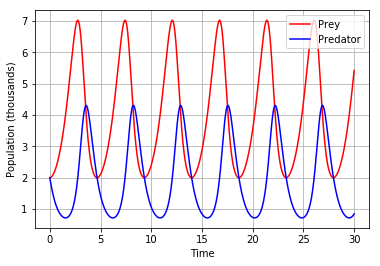

In [3]:
rabbits, foxes = arr_xy.T
fig = pylab.figure()
pylab.plot(t, rabbits, 'r-', label='Prey')
pylab.plot(t, foxes  , 'b-', label='Predator')
pylab.grid()
pylab.legend(loc='best')
pylab.xlabel('Time')
pylab.ylabel('Population (thousands)')
# pylab.title('Population of rabbits and foxes over time')